In [3]:
# importing python libraries
!pip install ipython
import numpy as np
import pandas as pd
import cufflinks as cf
from IPython.display import display, HTML
cf.set_config_file(sharing='iPublic',offline=True)

In [5]:
df_netflix = pd.read_csv('netflix_data.csv')

## Inspecting data set

In [6]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df_netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
df_netflix.shape

(8807, 12)

In [9]:
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
df_netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
#knowing the total missing values
df_netflix.isnull().sum().sort_values(ascending = False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [13]:
# knowing persantage of missing values 
(df_netflix.isnull().mean()*100).round(2).sort_values(ascending = False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [14]:
#top 10 director which they are contrubited number of movies 
df_netflix['director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

## Movies Vs TVShows

In [15]:
movievstvshows = df_netflix['type'].value_counts()

In [16]:
df_netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<Axes: ylabel='type'>

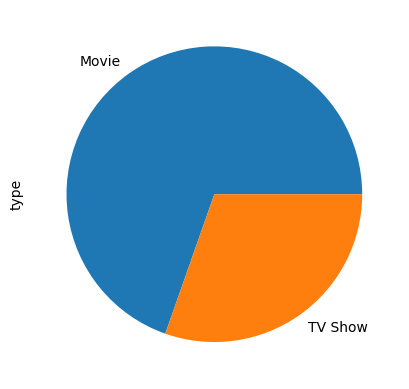

In [17]:
movievstvshows.plot(kind='pie')

In [18]:
df_netflix['rating'].value_counts().head(8)

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
Name: rating, dtype: int64

<Axes: title={'center': 'Ratings'}>

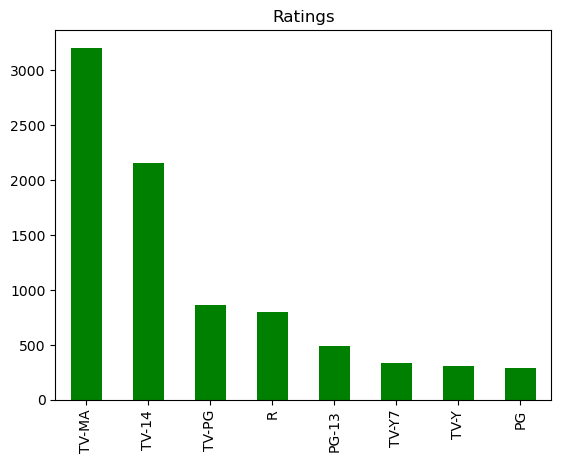

In [41]:
ratingsplot = df_netflix['rating'].value_counts().head(8)
ratingsplot.plot(kind="bar",color = ['Green'],title = 'Ratings')

The highest count - TV-MA is the rating that shows that a program is intended for adults. "MA stands for 'mature audiences.Children aged 17 and younger should not view these programs

Second largest is the TV-14 A TV-14 program is meant for children over 14 years of age. It is generally not recommended to let children watch the program without parental attendance, or at least without them vetting it first. It can contain crude humor, the use of harmful substances, strong language, violence, and complex or upsetting themes.

Third largest is the very popular 'R' rating. R is the short for retricted, so any young person under 17 should not watch.

In [20]:
# Top 10 countries that are contributed more content
countries_contributed = df_netflix['country'].value_counts().head(10)

In [21]:
df_netflix['country'].value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

<Axes: >

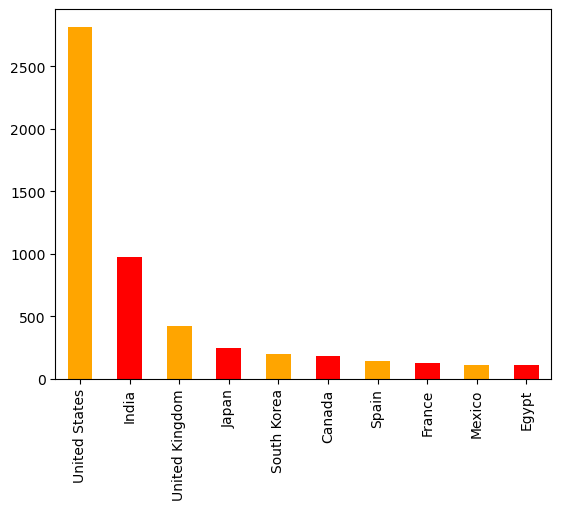

In [42]:
countries_contributed.plot(kind = 'bar', color = ["#FFA500" , 'Red'] )

## Year Wise Count

In [24]:
yearplot = df_netflix['release_year'].value_counts()

<Axes: >

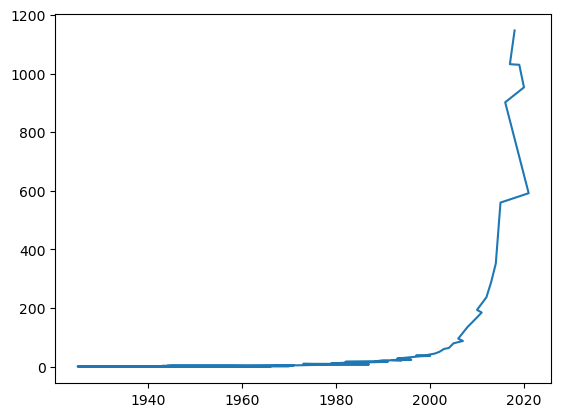

In [43]:
yearplot.plot(kind='line')

Highest Releases in 2018 followed by 2017 and 2019

In [44]:
df_netflix["listed_in"].value_counts().head(10)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

<Axes: ylabel='listed_in'>

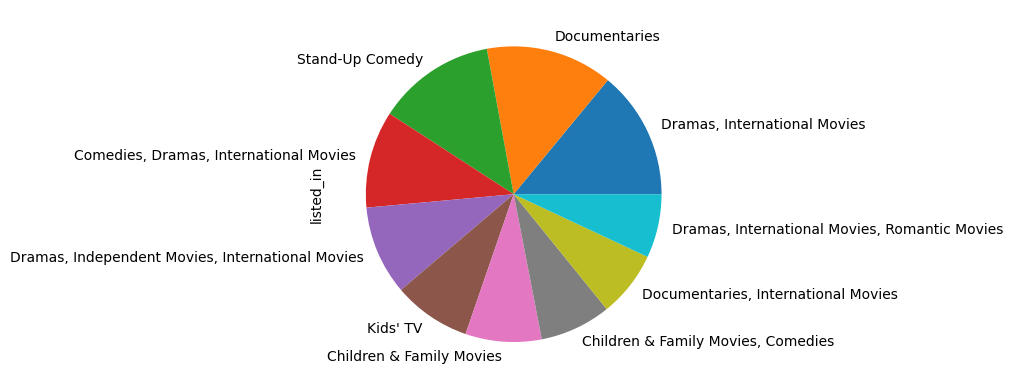

In [28]:
listedplot = df_netflix["listed_in"].value_counts().head(10)
listedplot.plot(kind='pie')

# Treating missing values 

In [29]:
(df_netflix.isnull().mean()*100).round(2).sort_values(ascending = False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [30]:
df_netflix.isnull().sum().sort_values(ascending = False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [31]:
df_netflix.dropna(subset=['rating','duration','date_added'],inplace = True)

In [32]:
df_netflix.shape

(8790, 12)

In [33]:
df_netflix["country"].replace(np.NaN,'Unkonwn',inplace=True)

In [34]:
df_netflix["country"].value_counts()

United States                             2809
India                                      972
Unkonwn                                    829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [35]:
df_netflix.isnull().sum().sort_values(ascending = False)

director        2621
cast             825
show_id            0
type               0
title              0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [36]:
df_netflix["cast"].replace(np.NaN,'No cast',inplace=True)

In [38]:
df_netflix["cast"].value_counts()

No cast                                                                                                                                          825
David Attenborough                                                                                                                                19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                           14
Samuel West                                                                                                                                       10
Jeff Dunham                                                                                                                                        7
                                                                                                                                                ... 
Sanjay Dutt, Arjun Kapoor, Kriti Sanon, Zeenat Aman, Mohnish Bahl, Padmini Kolhapure, Kunal Kapoor, Suhasi

In [39]:
df_netflix["director"].replace(np.NaN,'Not found',inplace=True)

In [40]:
df_netflix.isnull().sum().sort_values(ascending = False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Conclusion

**Data Overview:**

The dataset contains information about Netflix shows and movies, including details like title, director, cast, country, release year, rating, duration, genre, and description.

**Data Cleaning:**

Missing Values: The dataset had missing values in columns like "director," "cast," "country," "date_added," "rating," and "duration." You addressed missing values by either replacing them with appropriate values or dropping rows with missing data.

**Content Analysis:**

Type of Content:
There are more movies (6,131) than TV shows (2,676) available on Netflix.
Ratings: The most common rating on Netflix is "TV-MA," which indicates content intended for mature audiences. "TV-14" and "TV-PG" are the next most common ratings.
Release Year: The dataset includes content released between 1925 and 2021, with the highest number of releases in 2018, followed by 2017 and 2019.

**Director and Cast:**

Directors: The top directors contributing to Netflix content are Rajiv Chilaka, Raúl Campos, Jan Suter, Marcus Raboy, and Suhas Kadav.
Cast: There are a variety of cast members in the dataset, with some entries labeled as "No cast." The cast with the highest number of appearances is David Attenborough.
Countries Contributing Content:

The United States, India, and the United Kingdom are the top countries contributing content to Netflix. There are also some entries labeled as "Unknown."

**Genres:**
The dataset contains a wide range of genres, with "Dramas" and "Documentaries" being the most common. There are also combinations of genres in some entries.

**Data Visualization:**
Visualizations using Pie charts and Bar plots were used to illustrate the distribution of content types, ratings, and top directors.
Data Cleaning and Handling Missing Values:

We successfully handled missing values in the dataset, ensuring that the analysis is based on a cleaner dataset.
Overall, this analysis provides insights into the content available on Netflix, the distribution of ratings, and the contributions of directors and countries. It can be useful for making decisions related to content recommendations, targeting specific audiences, or understanding the content landscape on the platform.